## Урок № 7. Многомерный статистический анализ. Линейная регрессия

### Задание № 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

**Ответ:**

In [2]:
import numpy as np

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
zp, ks

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [13]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b1

2.620538882402765

In [14]:
b0 = np.mean(ks) - b1 * np.mean(zp)
b0

444.1773573243596

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
bb = np.mean(zp * ks) / np.mean(zp**2)
bb

5.889820420132688

In [4]:
def mse_score(y, y_pred):
    return np.mean((y - y_pred)**2)

In [24]:
mse_score(ks, b0 + b1 * zp), mse_score(ks, b1 * zp), mse_score(ks, bb * zp)

(6470.414201176658, 203763.93896082853, 56516.8584157194)

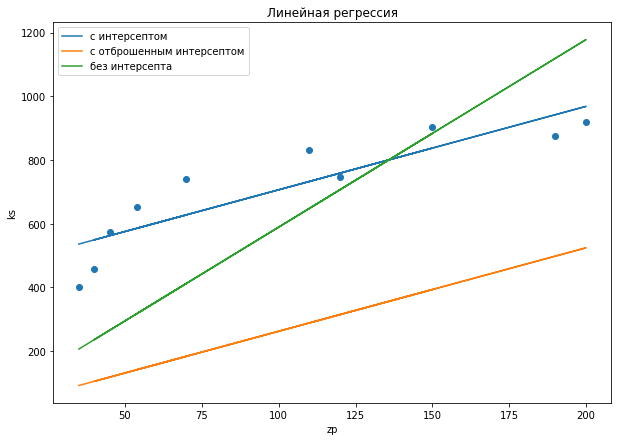

In [23]:
plt.figure(figsize=(10, 7))
plt.title('Линейная регрессия')
plt.xlabel('zp')
plt.ylabel('ks')
plt.scatter(zp, ks)
plt.plot(zp, b0 + b1 * zp, label='с интерсептом')
plt.plot(zp, b1 * zp, label='с отброшенным интерсептом') # не верно, просто отбросить интерсепт не правильно, для B1 есть формула при уравнении без интерсепта!
plt.plot(zp, bb * zp, label='без интерсепта')
plt.legend()

### Задание № 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

**Ответ:**

In [102]:
alpha2 = 1e-5
b1 = 0
max_num_iter = 1000
num_iter = 1
errors = []
min_weight_dist = 1e-5
weight_dist = np.inf
while weight_dist > min_weight_dist and num_iter < max_num_iter:
    new_b1 = b1 - alpha2 * 2 * np.sum(zp * (b1 * zp - ks)) / len(zp)
    errors.append(mse_score(ks, new_b1 * zp))
    weight_dist = np.abs(b1 - new_b1)
    print(f'Коэффициент B1 = {b1:.3f}, при значении mse = {errors[-1]:.6f}, изменение коэффициента B1 за итерацию = {weight_dist:.6f}')
    b1 = new_b1
    num_iter += 1

Коэффициент B1 = 0.000, при значении mse = 307349.799477, изменение коэффициента B1 за итерацию = 1.622834
Коэффициент B1 = 1.623, при значении mse = 188167.501522, изменение коэффициента B1 за итерацию = 1.175691
Коэффициент B1 = 2.799, при значении mse = 125614.209653, изменение коэффициента B1 за итерацию = 0.851751
Коэффициент B1 = 3.650, при значении mse = 92782.871519, изменение коэффициента B1 за итерацию = 0.617066
Коэффициент B1 = 4.267, при значении mse = 75551.216215, изменение коэффициента B1 за итерацию = 0.447045
Коэффициент B1 = 4.714, при значении mse = 66507.115017, изменение коэффициента B1 за итерацию = 0.323870
Коэффициент B1 = 5.038, при значении mse = 61760.283386, изменение коэффициента B1 за итерацию = 0.234633
Коэффициент B1 = 5.273, при значении mse = 59268.890371, изменение коэффициента B1 за итерацию = 0.169984
Коэффициент B1 = 5.443, при значении mse = 57961.273074, изменение коэффициента B1 за итерацию = 0.123148
Коэффициент B1 = 5.566, при значении mse = 

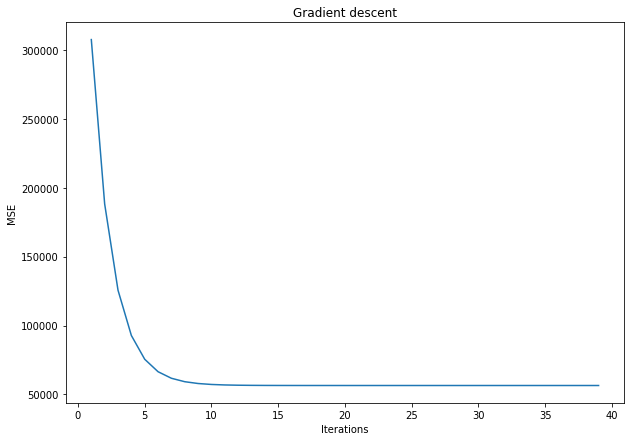

In [103]:
plt.figure(figsize=(10, 7))
plt.title('Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(range(1, len(errors)+1), errors)
plt.show()

In [75]:
import pandas as pd

In [82]:
df = pd.DataFrame(data={'zp': zp, 'ks': ks, 'ks_pred': np.array([round(b1 * x, 2) for x in zp])}).sort_values('zp').reset_index(drop=True)
df

,zp,ks,ks_pred
0,35,401,206.14
1,40,459,235.59
2,45,574,265.04
3,54,653,318.05
4,70,739,412.29
5,110,832,647.88
6,120,746,706.78
7,150,902,883.47
8,190,874,1119.06
9,200,919,1177.96


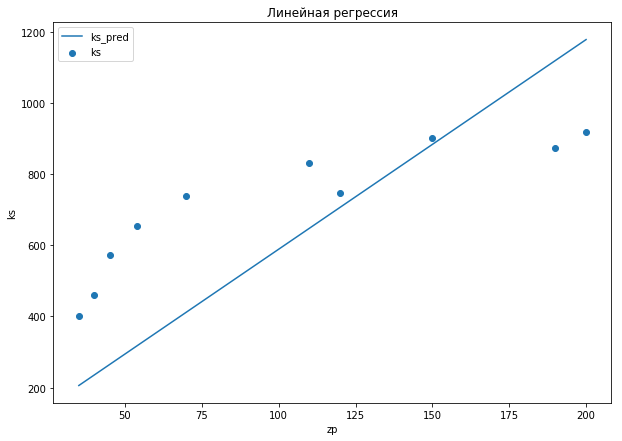

In [140]:
plt.figure(figsize=(10, 7))
plt.title('Линейная регрессия')
plt.xlabel('zp')
plt.ylabel('ks')
plt.scatter(df['zp'], df['ks'])
plt.plot(df['zp'], df['ks_pred'], label='ks_pred')
plt.legend()

### Задание № 3.
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

**Ответ:**

1 - для определения значения Z-критерия (когда известна дисперсия ген. совокупности), 2 - для определения значения t-критерия (когда дисперсия ген. совокупности не известна)

### Задание № 4*.
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

**Ответ:** (градиентный спуск у нас был на первом занятии курса "Алгоритмы анализа данных")

In [5]:
zp = zp.reshape(len(zp), 1)
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [6]:
ks = ks.reshape((-1, 1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [7]:
features = np.hstack((np.ones((len(zp), 1)), zp))
features

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [8]:
alpha4 = 5e-5
coef = np.zeros((2, 1))
max_num_iter = 1000000
num_iter = 1
errors = []
min_weight_dist = 1e-4
weight_dist = np.inf
while weight_dist > min_weight_dist and num_iter < max_num_iter:
    new_coef = coef - alpha4 * 2 * features.T @ (features @ coef - ks) / zp.shape[0]
    errors.append(mse_score(ks, features @ new_coef))
    
    weight_dist = np.sum((coef - new_coef)**2)**0.5
    if num_iter % 1000 == 0:
        print(f'Коэффициенты B0 = {coef[0, 0]:.3f} и B1 = {coef[1, 0]:.3f}, при значении mse = {errors[-1]:.6f}, изменение вектора коэффициентов = {weight_dist:.6f}')
    coef = new_coef
    num_iter += 1

Коэффициенты B0 = 11.156 и B1 = 5.808, при значении mse = 54031.998443, изменение вектора коэффициентов = 0.010984
Коэффициенты B0 = 22.002 и B1 = 5.728, при значении mse = 51679.338363, изменение вектора коэффициентов = 0.010709
Коэффициенты B0 = 32.576 и B1 = 5.650, при значении mse = 49443.053915, изменение вектора коэффициентов = 0.010441
Коэффициенты B0 = 42.885 и B1 = 5.574, при значении mse = 47317.388515, изменение вектора коэффициентов = 0.010179
Коэффициенты B0 = 52.936 и B1 = 5.500, при значении mse = 45296.870330, изменение вектора коэффициентов = 0.009924
Коэффициенты B0 = 62.735 и B1 = 5.428, при значении mse = 43376.298195, изменение вектора коэффициентов = 0.009676
Коэффициенты B0 = 72.289 и B1 = 5.358, при значении mse = 41550.728224, изменение вектора коэффициентов = 0.009433
Коэффициенты B0 = 81.604 и B1 = 5.289, при значении mse = 39815.461081, изменение вектора коэффициентов = 0.009197
Коэффициенты B0 = 90.685 и B1 = 5.222, при значении mse = 38166.029887, изменени

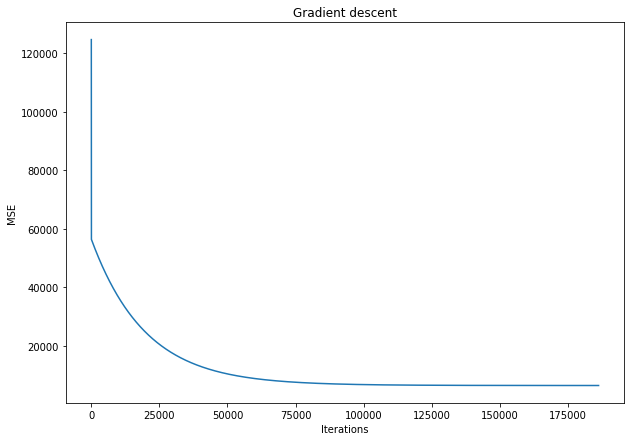

In [162]:
plt.figure(figsize=(10, 7))
plt.title('Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(range(1, len(errors)+1), errors)
plt.show()

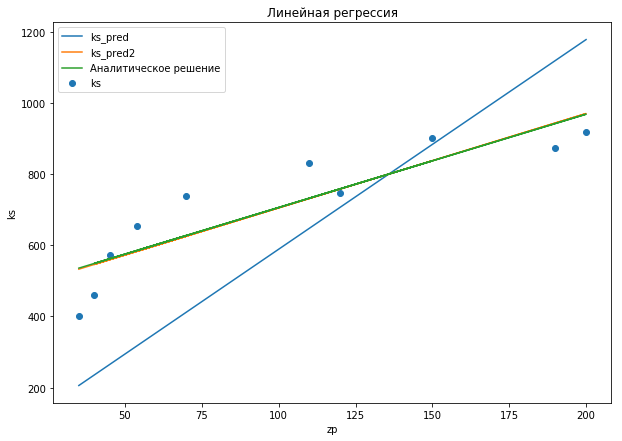

In [163]:
plt.figure(figsize=(10, 7))
plt.title('Линейная регрессия')
plt.xlabel('zp')
plt.ylabel('ks')
plt.scatter(df['zp'], df['ks'])
plt.plot(df['zp'], df['ks_pred'], label='ks_pred')
plt.plot(features[:, 1], features @ new_coef, label='ks_pred2')
plt.plot(features[:, 1], features @ np.linalg.solve(features.T.dot(features), features.T.dot(ks)), label='Аналитическое решение')
plt.legend()

In [160]:
# Среднеквадратичная ошибка для аналитически найденных коэффициентов:
mse_score(ks, features @ np.linalg.solve(features.T.dot(features), features.T.dot(ks)))

6470.414201176657